# DATA IMPORT

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.options.display.max_columns = 50

In [3]:
FILES_DIR = './files/'
events = pd.read_csv(FILES_DIR + 'sampled_events.csv')
product = pd.read_csv(FILES_DIR + 'sampled_products.csv')
users = pd.read_csv(FILES_DIR + 'sampled_users.csv')

In [4]:
events_df = events.copy()
product_df = product.copy()
users_df = users.copy()

In [5]:
print(events_df.shape)
print(product_df.shape)
print(users_df.shape)

(5880407, 13)
(283326, 12)
(254958, 3)


In [6]:
print(events_df.columns)
print(product_df.columns)
print(users_df.columns)

Index(['session_id', 'event_timestamp', 'event_name', 'user_no', 'item_no',
       'device_type', 'mobile_brand_name', 'mobile_model_name',
       'mobile_marketing_name', 'operating_system_version', 'country',
       'region', 'platform'],
      dtype='object')
Index(['item_no', 'item_name', 'image_name', 'price', 'category1_code',
       'category1_name', 'category2_code', 'category2_name', 'category3_code',
       'category3_name', 'brand_no', 'brand_name'],
      dtype='object')
Index(['user_no', 'birth_date', 'gender'], dtype='object')


In [7]:
events_df.head()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID
1,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID
2,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:02.35,click_item,FJJ6W70VNARaqflivNavLg==,xuuGT7/l+fld/geUzu6BkA==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
3,51e148afe55e6f296c0931cac6bc2c1d,2021-06-03 13:00:02.994,click_item,MsFi+mS5EhwSv+ZqTtZ53w==,FC0aiDVh1JjIXUschc44Pg==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Gyeongsangbuk-do,IOS
4,3316370366bdbd2fdff02e996c1b2721,2021-06-03 13:00:03.312001,add_to_cart,frWHEf/czsCEjklEIwxxKA==,yXpbzgtgRe37PEbJlBiKmQ==,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,Seoul,ANDROID


In [8]:
product_df.head()

,item_no,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
0,++/211gtgspgB1TaPWEUQw==,베스트 코트\n( Vest Coat )_lavender,6842e3f320ef4459fac54dcea70c8245,1150000.0,243100100,의류,243101100,아우터,243101103,코트,4308.0,FOCEPS
1,++4eWFkX4oCtVYiKi34/Dw==,21SS 넥 페이스 패치 기모 맨투맨 블랙 CI0062 AHJ,1bdc06804580fddfbe46d4e2af140f08,466830.0,243100100,의류,243102100,상의,243102103,티셔츠,9302.0,Acne Studios_바이스트
2,++BoE+rYvLTJEAXMQFQLpQ==,[서울웰컴티 선물 세트] 일상 옥수수차,cb4a9bb103f9bd84d5d126ad4acec74b,15000.0,249100100,식품,249105100,음료,249105105,차류,4775.0,Urbanbookshop
3,++RIzj1vpFLWgoX7LgCfLQ==,PLAIN SQUARE BAG S (IV),4c3f75e886c8114d7d00d19a4f0c34d5,118000.0,244100100,잡화,244102100,가방,244102104,토트백,2546.0,zisoo
4,++W7/YMlPMwbAfyyJZEuIw==,클리어 바디미스트 150ml,5f136d4e25c837c3b658de16ac2156d9,27000.0,247100100,화장품/미용,247109100,바디케어,247109104,바디미스트,12986.0,밀크바오밥


In [9]:
users_df.head()

,user_no,birth_date,gender
0,++MXKfwkOw4VFn9HkVCRrw==,1994-08-25,F
1,++QhQ1e1epIwx3vRl2Jo3g==,1994-08-20,F
2,++gfxvExR4bVIl3/hWsX7Q==,1990-11-14,F
3,++hK92KjjWxhaH5fVgRFww==,1997-03-30,F
4,++izmuIS/QEffdUxvt0y4Q==,1992-09-07,F


# 전처리

## null 처리

In [10]:
events_df.isnull().sum()

session_id                        0
event_timestamp                   0
event_name                        0
user_no                           0
item_no                           0
device_type                       0
mobile_brand_name              3594
mobile_model_name              3594
mobile_marketing_name       4250941
operating_system_version          0
country                          12
region                         2195
platform                          0
dtype: int64

In [11]:
events_df[['mobile_brand_name', 'mobile_model_name', 'mobile_marketing_name', 'country', 'region']]

,mobile_brand_name,mobile_model_name,mobile_marketing_name,country,region
0,Samsung,SM-N960N,Galaxy Note9,South Korea,Gyeonggi-do
1,Samsung,SM-G977N,Galaxy S10 5G,South Korea,Seoul
2,Apple,iPhone,NaN,South Korea,Seoul
3,Apple,iPhone,NaN,South Korea,Gyeongsangbuk-do
4,Samsung,SM-G970N,Galaxy S10e,South Korea,Seoul
...,...,...,...,...,...
5880402,Apple,iPhone,NaN,South Korea,Gyeongsangnam-do
5880403,Apple,iPhone,NaN,South Korea,Gyeongsangnam-do
5880404,Apple,iPhone,NaN,South Korea,Gyeonggi-do
5880405,Samsung,SM-G977N,Galaxy S10 5G,South Korea,Busan


In [12]:
events_df['platform']

0          ANDROID
1          ANDROID
2              IOS
3              IOS
4          ANDROID
            ...   
5880402        IOS
5880403        IOS
5880404        IOS
5880405    ANDROID
5880406        IOS
Name: platform, Length: 5880407, dtype: object

In [13]:
events_df.drop('mobile_marketing_name', axis=1, inplace=True)
events_df.drop('mobile_brand_name', axis=1, inplace=True)
events_df.drop('mobile_model_name', axis=1, inplace=True)
events_df['country'].fillna('un_country', inplace=True)
events_df['region'].fillna('un_region', inplace=True)

In [14]:
product_df.isnull().sum()

item_no            0
item_name          0
image_name         0
price              0
category1_code     0
category1_name     0
category2_code     0
category2_name     0
category3_code     0
category3_name     0
brand_no           3
brand_name        19
dtype: int64

In [15]:
product_df.dropna(axis=0, inplace=True)

In [16]:
users_df.isnull().sum()

user_no           0
birth_date    23676
gender        40948
dtype: int64

In [17]:
users_df['birth_date'].fillna('un_birth_date', inplace=True)
users_df['gender'].fillna('un_gender', inplace=True)

## events_df

### 시계열 데이터 처리

In [18]:
events_df['event_timestamp']

0             2021-06-03 13:00:01.845
1          2021-06-03 13:00:01.920001
2              2021-06-03 13:00:02.35
3             2021-06-03 13:00:02.994
4          2021-06-03 13:00:03.312001
                      ...            
5880402    2021-08-04 12:59:53.129054
5880403       2021-08-04 12:59:56.151
5880404    2021-08-04 12:59:56.952028
5880405    2021-08-04 12:59:58.019142
5880406    2021-08-04 12:59:59.284045
Name: event_timestamp, Length: 5880407, dtype: object

In [19]:
events_df['event_timestamp'] = pd.to_datetime(events_df['event_timestamp'])

In [20]:
print(events_df.dtypes) # events_df dtype들 모두 보여줌
events_df['event_timestamp']

session_id                          object
event_timestamp             datetime64[ns]
event_name                          object
user_no                             object
item_no                             object
device_type                         object
operating_system_version            object
country                             object
region                              object
platform                            object
dtype: object


0         2021-06-03 13:00:01.845000
1         2021-06-03 13:00:01.920001
2         2021-06-03 13:00:02.350000
3         2021-06-03 13:00:02.994000
4         2021-06-03 13:00:03.312001
                     ...            
5880402   2021-08-04 12:59:53.129054
5880403   2021-08-04 12:59:56.151000
5880404   2021-08-04 12:59:56.952028
5880405   2021-08-04 12:59:58.019142
5880406   2021-08-04 12:59:59.284045
Name: event_timestamp, Length: 5880407, dtype: datetime64[ns]

In [21]:
events_df["event_timestamp_year"] = events_df["event_timestamp"].dt.year
events_df["event_timestamp_month"] = events_df["event_timestamp"].dt.month
events_df["event_timestamp_day"] = events_df["event_timestamp"].dt.day
events_df["event_timestamp_hour"] = events_df["event_timestamp"].dt.hour
events_df["event_timestamp_minute"] = events_df["event_timestamp"].dt.minute

print(events_df.shape) # 내용 변경 후 row와 컬럼 형태 확인

events_df[["event_timestamp", "event_timestamp_year", "event_timestamp_month",\
            "event_timestamp_day", "event_timestamp_hour", "event_timestamp_minute"]].head()

(5880407, 15)


,event_timestamp,event_timestamp_year,event_timestamp_month,event_timestamp_day,event_timestamp_hour,event_timestamp_minute
0,2021-06-03 13:00:01.845000,2021,6,3,13,0
1,2021-06-03 13:00:01.920001,2021,6,3,13,0
2,2021-06-03 13:00:02.350000,2021,6,3,13,0
3,2021-06-03 13:00:02.994000,2021,6,3,13,0
4,2021-06-03 13:00:03.312001,2021,6,3,13,0


### OS데이터 처리

In [22]:
events_df.columns

Index(['session_id', 'event_timestamp', 'event_name', 'user_no', 'item_no',
       'device_type', 'operating_system_version', 'country', 'region',
       'platform', 'event_timestamp_year', 'event_timestamp_month',
       'event_timestamp_day', 'event_timestamp_hour',
       'event_timestamp_minute'],
      dtype='object')

In [23]:
events_df['operating_system_version']

0          Android 10
1          Android 11
2          iOS 14.4.2
3          iOS 14.4.2
4          Android 11
              ...    
5880402      iOS 14.6
5880403      iOS 14.6
5880404      iOS 14.6
5880405    Android 11
5880406      iOS 14.6
Name: operating_system_version, Length: 5880407, dtype: object

In [24]:
events_df['operating_system_version'].unique()

array(['Android 10', 'Android 11', 'iOS 14.4.2', 'iOS 14.4', 'iOS 14.5.1',
       'Android 8.0.0', 'iOS 14.4.1', 'iOS 14.3', 'iOS 14.6',
       'Android 6.0.1', 'iOS 14.1', 'iOS 14.0.1', 'iOS 14.2', 'Android 9',
       'iOS 14.5', 'iOS 12.5.3', 'iOS 14.2.1', 'iOS 13.6', 'iOS 14.0',
       'iOS 11.4.1', 'iOS 13.6.1', 'iOS 13.7', 'iOS 13.5.1', 'iOS 12.3.1',
       'Android 7.0', 'iOS 13.2', 'iOS 13.3.1', 'Android 8.1.0',
       'iOS 13.0', 'iOS 13.2.2', 'iOS 13.4.1', 'iOS 14.7', 'iOS 11.0.3',
       'iOS 13.4', 'iOS 12.5.2', 'iOS 13.3', 'iOS 13.1', 'iOS 13.1.3',
       'iOS 12.1.3', 'iOS 13.1.2', 'iOS 13.5', 'iOS 12.4.8',
       'Android 7.1.1', 'iOS 12.1.4', 'iOS 11.4', 'Android 7.1.2',
       'iOS 12.4', 'iOS 12.4.9', 'iOS 12.4.1', 'iOS 13.2.3', 'iOS 12.2',
       'iOS 11.3.1', 'iOS 11.3', 'iOS 12.1.2', 'iOS 12.5.1', 'iOS 11.1.2',
       'iOS 12.0.1', 'iOS 12.1', 'iOS 11.1.1', 'iOS 12.4.4', 'iOS 13.1.1',
       'iOS 12.1.1', 'iOS 12.3.2', 'iOS 12.4.6', 'iOS 12.0', 'iOS 11.0.2',
       

In [25]:
def find_ostype(OS): # find_ostype이라는 함수 지정
    if 'iOS' in OS:  # 만약 'iOS'라는 string이 OS에 있으면
        return "iOS"        # 'iOS'라는 string만 출력한다
    else:                   # 그게 아니라면
        return 'Android'    # 'Android'라는 string만 출력한다

In [26]:
events_df['ostype'] = events_df['operating_system_version'].apply(find_ostype) # find_ostype 적용
print(events_df['ostype'].unique()) # ostype의 값들 확인
events_df['ostype'].head()    

['Android' 'iOS']


0    Android
1    Android
2        iOS
3        iOS
4    Android
Name: ostype, dtype: object

In [27]:
events_df['osversion(number)'] = events_df['operating_system_version']\
                                    .str.replace('iOS', '').str.replace('Android', '')

print(events_df['osversion(number)'].unique()) # 해당 컬럼의 값들 확인
events_df['osversion(number)'].head()   

[' 10' ' 11' ' 14.4.2' ' 14.4' ' 14.5.1' ' 8.0.0' ' 14.4.1' ' 14.3'
 ' 14.6' ' 6.0.1' ' 14.1' ' 14.0.1' ' 14.2' ' 9' ' 14.5' ' 12.5.3'
 ' 14.2.1' ' 13.6' ' 14.0' ' 11.4.1' ' 13.6.1' ' 13.7' ' 13.5.1' ' 12.3.1'
 ' 7.0' ' 13.2' ' 13.3.1' ' 8.1.0' ' 13.0' ' 13.2.2' ' 13.4.1' ' 14.7'
 ' 11.0.3' ' 13.4' ' 12.5.2' ' 13.3' ' 13.1' ' 13.1.3' ' 12.1.3' ' 13.1.2'
 ' 13.5' ' 12.4.8' ' 7.1.1' ' 12.1.4' ' 11.4' ' 7.1.2' ' 12.4' ' 12.4.9'
 ' 12.4.1' ' 13.2.3' ' 12.2' ' 11.3.1' ' 11.3' ' 12.1.2' ' 12.5.1'
 ' 11.1.2' ' 12.0.1' ' 12.1' ' 11.1.1' ' 12.4.4' ' 13.1.1' ' 12.1.1'
 ' 12.3.2' ' 12.4.6' ' 12.0' ' 11.0.2' ' 11.2.1' ' 11.2.6' ' 12.3' ' 15.0'
 ' 11.2.5' ' 12.4.5' ' 11.0.1' ' 6.0' ' 12.5.4' ' 11.2' ' 12.4.2' ' 12.5'
 ' 12' ' 14.7.1']


0         10
1         11
2     14.4.2
3     14.4.2
4         11
Name: osversion(number), dtype: object

In [28]:
os_data = (events_df
                .groupby(['ostype', 'osversion(number)']) # 여러 컬럼들 중 연관된 컬럼을 그룹화 합니다
                .size() # 그룹별 속한 row 수를 반환합니다.
                .rename('count_values') # 컬럼이름을 count_values로 변경합니다.
                )
os_data.to_frame() # to_frame()을 통해 series형식을 dataframe형식으로 보여줍니다.

count_values
ostype  osversion(number)              
Android  10                      330140
         11                     1107899
         12                           4
         6.0                         76
         6.0.1                     2488
...                                 ...
iOS      14.5.1                  125586
         14.6                   2908354
         14.7                     28979
         14.7.1                   14174
         15.0                      3095

[80 rows x 1 columns]

In [29]:
os_data = os_data.to_frame() # DataFrame으로 변경된 os_data을 다시 덮어씁니다.
os_data.T['Android']               # .T 는 현재 보고있는 DataFrame을 반전시키는 기능입니다.

osversion(number),10,11,12,6.0,6.0.1,7.0,7.1.1,7.1.2,8.0.0,8.1.0,9
count_values,330140,1107899,4,76,2488,8779,1322,53,25821,9048,153371


In [30]:
os_data.T['iOS'] # os_clean_data 를 반전시킨 후 iOS 버전만 봅니다.

osversion(number),11.0.1,11.0.2,11.0.3,11.1.1,11.1.2,11.2,11.2.1,11.2.5,11.2.6,11.3,11.3.1,11.4,11.4.1,12.0,12.0.1,12.1,12.1.1,12.1.2,12.1.3,12.1.4,12.2,12.3,12.3.1,12.3.2,12.4,...,13.2.3,13.3,13.3.1,13.4,13.4.1,13.5,13.5.1,13.6,13.6.1,13.7,14.0,14.0.1,14.1,14.2,14.2.1,14.3,14.4,14.4.1,14.4.2,14.5,14.5.1,14.6,14.7,14.7.1,15.0
count_values,2,65,172,18,378,8,104,527,14,110,406,486,627,203,236,542,55,309,240,1117,1738,89,1739,17,1319,...,3046,11033,11004,1802,8655,2325,19150,12732,16253,26709,14190,19710,23746,45369,22658,64889,117824,60426,615947,38076,125586,2908354,28979,14174,3095


## product_df

In [31]:
product_df.columns

Index(['item_no', 'item_name', 'image_name', 'price', 'category1_code',
       'category1_name', 'category2_code', 'category2_name', 'category3_code',
       'category3_name', 'brand_no', 'brand_name'],
      dtype='object')

In [32]:
product_df['category1_name'].value_counts()

의류            126456
잡화             86532
가구/인테리어        20456
생활/건강          20147
디지털/가전         13543
화장품/미용          6645
식품              3359
스포츠/레저          2427
반려동물            1458
컬처              1454
키즈               777
성년의날              24
홈_OLD             12
패션잡화_OLD           9
라이프스타일_OLD         4
여성패션_OLD           2
뷰티_OLD             2
Name: category1_name, dtype: int64

In [33]:
product_df['category1_name'].value_counts(normalize=True)

의류            0.446357
잡화            0.305435
가구/인테리어       0.072204
생활/건강         0.071114
디지털/가전        0.047803
화장품/미용        0.023455
식품            0.011856
스포츠/레저        0.008567
반려동물          0.005146
컬처            0.005132
키즈            0.002743
성년의날          0.000085
홈_OLD         0.000042
패션잡화_OLD      0.000032
라이프스타일_OLD    0.000014
여성패션_OLD      0.000007
뷰티_OLD        0.000007
Name: category1_name, dtype: float64

In [34]:
cat1_name = product_df['category1_name'].value_counts()
print(cat1_name)  # 내용 확인
print('총 개수 = ',cat1_name.sum()) # 총합 확인
print('의류의 비율은 = ', cat1_name['의류'] / cat1_name.sum())  # 의류비율

의류            126456
잡화             86532
가구/인테리어        20456
생활/건강          20147
디지털/가전         13543
화장품/미용          6645
식품              3359
스포츠/레저          2427
반려동물            1458
컬처              1454
키즈               777
성년의날              24
홈_OLD             12
패션잡화_OLD           9
라이프스타일_OLD         4
여성패션_OLD           2
뷰티_OLD             2
Name: category1_name, dtype: int64
총 개수 =  283307
의류의 비율은 =  0.4463567790418168


In [35]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<Axes: xlabel='category1_name', ylabel='count'>

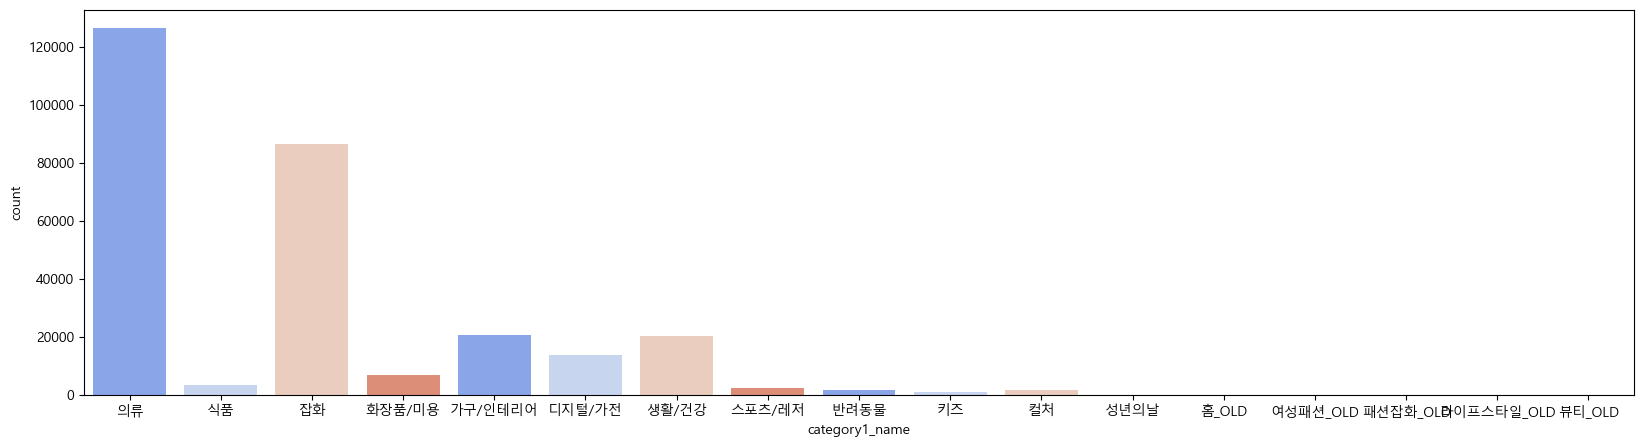

In [36]:
plt.figure(figsize=[20, 5])  # 그래프의 크기 지정
sns.countplot(data = product_df, x='category1_name'\
              , palette=sns.color_palette('coolwarm', 4))  # palette를 사용하여 그래프 bar 색 지정

In [37]:
product_df.columns

Index(['item_no', 'item_name', 'image_name', 'price', 'category1_code',
       'category1_name', 'category2_code', 'category2_name', 'category3_code',
       'category3_name', 'brand_no', 'brand_name'],
      dtype='object')

In [38]:
product_df['category2_name'].value_counts()

상의              62823
하의              29018
신발              23131
가방              22658
주얼리             18564
                ...  
여성하의_OLD            1
여성슈즈_OLD            1
패브릭_OLD             1
유니섹스슈즈_OLD          1
유니섹스악세서리_OLD        1
Name: category2_name, Length: 105, dtype: int64

In [39]:
product_df['category3_name'].value_counts()

티셔츠            31414
바지             16989
셔츠/블라우스        13415
원피스            10498
재킷              7817
               ...  
쿠션_OLD             1
야외벤츠               1
렌즈용품               1
디퓨져/방향제_OLD        1
쉐이딩,컨투어링           1
Name: category3_name, Length: 730, dtype: int64

In [40]:
product_df['brand_name'].value_counts()

FREITAG          1287
shoopen           815
NIKE_비비엘유이        812
꾸미까               802
earpearp          767
                 ... 
EKDESIGN            1
ANSWERINGBIRD       1
Lasomme_            1
SAMSUNG_선우전자        1
Verbatim            1
Name: brand_name, Length: 7857, dtype: int64

In [41]:
product_df['price'].value_counts()

39000.0      7408
49000.0      6480
59000.0      6022
69000.0      5643
79000.0      5441
             ... 
2784600.0       1
5735000.0       1
181700.0        1
2810000.0       1
140500.0        1
Name: price, Length: 3816, dtype: int64

In [42]:
print(len(product_df[product_df['price'] <= 100]))
product_df[product_df['price'] <= 100].head()

15


,item_no,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
5070,74hlBZXEX5M+3EfAct1Hqg==,코웨이 멀티액션 공기청정기 AP-1516D 렌탈 l 36개월약정 l 등록비+배송비+...,e374f18bfc6b37656a52052a80068994,0.0,246100100,디지털/가전,246107100,계절가전,246107102,공기정화기/공기청정기,12378.0,COWAY_예신
33447,wTEqFfrprXX5mjdCsky0KQ==,코웨이 대용량 슬림 냉온정수기 CHP-5710L 렌탈 l 36개월약정 l 등록비+배...,a1a92c62515bc98681ad2c7716dfe852,0.0,246100100,디지털/가전,246108100,주방가전,246108116,정수기,12378.0,COWAY_예신
52199,SIgJnsLg/SwaXBIAvDplFw==,코웨이 아이스 얼음 냉온정수기 CHPI-6500L 렌탈 l 36개월약정 l 등록비+...,4920050c33b0469a07f6bc7ee0fae41e,0.0,246100100,디지털/가전,246108100,주방가전,246108116,정수기,12378.0,COWAY_예신
52780,TNw2xcWUXLDQAwTyWH8RuQ==,삼성전자 무풍 스탠드 에어컨 (17평형) AF17A7974TZS 렌탈 l 등록비+배...,14b1e59f5d1eca851ef5acf3422577f8,0.0,246100100,디지털/가전,246107100,계절가전,246107101,에어콘,15212.0,SAMSUNG_예신
90953,YyGX2/UlteJneUXTKl894A==,LG케어솔루션 오브제 냉온정수기 WD503ACB/AGB 렌탈 l ~72개월약정 l ...,6fe296626bbb7689dcafbce1a7f4a490,0.0,246100100,디지털/가전,246108100,주방가전,246108116,정수기,13279.0,LG Care Solution_예신


In [43]:
print(product_df[product_df['price'] <= 100].price.unique())
product_df = product_df[product_df['price'] != 0]
product_df.head()

[0.]


,item_no,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
0,++/211gtgspgB1TaPWEUQw==,베스트 코트\n( Vest Coat )_lavender,6842e3f320ef4459fac54dcea70c8245,1150000.0,243100100,의류,243101100,아우터,243101103,코트,4308.0,FOCEPS
1,++4eWFkX4oCtVYiKi34/Dw==,21SS 넥 페이스 패치 기모 맨투맨 블랙 CI0062 AHJ,1bdc06804580fddfbe46d4e2af140f08,466830.0,243100100,의류,243102100,상의,243102103,티셔츠,9302.0,Acne Studios_바이스트
2,++BoE+rYvLTJEAXMQFQLpQ==,[서울웰컴티 선물 세트] 일상 옥수수차,cb4a9bb103f9bd84d5d126ad4acec74b,15000.0,249100100,식품,249105100,음료,249105105,차류,4775.0,Urbanbookshop
3,++RIzj1vpFLWgoX7LgCfLQ==,PLAIN SQUARE BAG S (IV),4c3f75e886c8114d7d00d19a4f0c34d5,118000.0,244100100,잡화,244102100,가방,244102104,토트백,2546.0,zisoo
4,++W7/YMlPMwbAfyyJZEuIw==,클리어 바디미스트 150ml,5f136d4e25c837c3b658de16ac2156d9,27000.0,247100100,화장품/미용,247109100,바디케어,247109104,바디미스트,12986.0,밀크바오밥


## users_df

In [44]:
print(users_df.info())
print('\n')
print(users_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254958 entries, 0 to 254957
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_no     254958 non-null  object
 1   birth_date  254958 non-null  object
 2   gender      254958 non-null  object
dtypes: object(3)
memory usage: 5.8+ MB
None


Index(['user_no', 'birth_date', 'gender'], dtype='object')


In [45]:
users_df['gender'].unique() #un_gender는 결측치 처리할때 nan값을 처리한 값입니다

array(['F', 'M', 'un_gender'], dtype=object)

In [46]:
print(users_df['gender'].value_counts())
print('\n')
print(users_df['gender'].value_counts(normalize=True))

F            163130
M             50880
un_gender     40948
Name: gender, dtype: int64


F            0.639831
M            0.199562
un_gender    0.160607
Name: gender, dtype: float64


In [47]:
today = pd.Timestamp.now().floor('D')
users_df['birth_date'] = pd.to_datetime(users_df['birth_date'], errors='coerce')
users_df = users_df[~pd.isnull(users_df['birth_date'])] 
users_df['age'] = ((today - users_df['birth_date']).dt.days / 365.25).astype(int)

In [48]:
users_df.head()

,user_no,birth_date,gender,age
0,++MXKfwkOw4VFn9HkVCRrw==,1994-08-25,F,28
1,++QhQ1e1epIwx3vRl2Jo3g==,1994-08-20,F,28
2,++gfxvExR4bVIl3/hWsX7Q==,1990-11-14,F,32
3,++hK92KjjWxhaH5fVgRFww==,1997-03-30,F,26
4,++izmuIS/QEffdUxvt0y4Q==,1992-09-07,F,30


In [49]:
# 가장 나이가 어린 고객을 찾습니다
# 결과는 5세라고 나오지만, 5세 사용자가 이 서비스를 사용할 수도 있지만 가능성은 낮습니다
print('최소 나이는 = ', users_df['age'].min())

# 가장 나이가 많은 고객을 찾습니다
print('최대 나이는 = ', users_df['age'].max())

최소 나이는 =  5
최대 나이는 =  99


In [50]:
users_df

,user_no,birth_date,gender,age
0,++MXKfwkOw4VFn9HkVCRrw==,1994-08-25,F,28
1,++QhQ1e1epIwx3vRl2Jo3g==,1994-08-20,F,28
2,++gfxvExR4bVIl3/hWsX7Q==,1990-11-14,F,32
3,++hK92KjjWxhaH5fVgRFww==,1997-03-30,F,26
4,++izmuIS/QEffdUxvt0y4Q==,1992-09-07,F,30
...,...,...,...,...
254953,zzJh2DNSlyzZYCx1T7Yprw==,1984-02-01,F,39
254954,zzQb08qbNg8VZ+c3wMVhuw==,1972-12-15,F,50
254955,zzblhcY6j0rWP7m/5w6kqg==,2002-02-26,F,21
254956,zzzTNW8escss3zrnpuGMhQ==,1991-10-27,M,31


## 데이터 병합 (merge)

In [51]:
print(events_df.shape)
print(events_df.columns)
events_df.head(3)

(5880407, 17)
Index(['session_id', 'event_timestamp', 'event_name', 'user_no', 'item_no',
       'device_type', 'operating_system_version', 'country', 'region',
       'platform', 'event_timestamp_year', 'event_timestamp_month',
       'event_timestamp_day', 'event_timestamp_hour', 'event_timestamp_minute',
       'ostype', 'osversion(number)'],
      dtype='object')


,session_id,event_timestamp,event_name,user_no,item_no,device_type,operating_system_version,country,region,platform,event_timestamp_year,event_timestamp_month,event_timestamp_day,event_timestamp_hour,event_timestamp_minute,ostype,osversion(number)
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845000,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Android 10,South Korea,Gyeonggi-do,ANDROID,2021,6,3,13,0,Android,10
1,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,mobile,Android 11,South Korea,Seoul,ANDROID,2021,6,3,13,0,Android,11
2,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:02.350000,click_item,FJJ6W70VNARaqflivNavLg==,xuuGT7/l+fld/geUzu6BkA==,mobile,iOS 14.4.2,South Korea,Seoul,IOS,2021,6,3,13,0,iOS,14.4.2


In [52]:
print(product_df.shape)
print(product_df.columns)
product_df.head(3)

(283292, 12)
Index(['item_no', 'item_name', 'image_name', 'price', 'category1_code',
       'category1_name', 'category2_code', 'category2_name', 'category3_code',
       'category3_name', 'brand_no', 'brand_name'],
      dtype='object')


,item_no,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
0,++/211gtgspgB1TaPWEUQw==,베스트 코트\n( Vest Coat )_lavender,6842e3f320ef4459fac54dcea70c8245,1150000.0,243100100,의류,243101100,아우터,243101103,코트,4308.0,FOCEPS
1,++4eWFkX4oCtVYiKi34/Dw==,21SS 넥 페이스 패치 기모 맨투맨 블랙 CI0062 AHJ,1bdc06804580fddfbe46d4e2af140f08,466830.0,243100100,의류,243102100,상의,243102103,티셔츠,9302.0,Acne Studios_바이스트
2,++BoE+rYvLTJEAXMQFQLpQ==,[서울웰컴티 선물 세트] 일상 옥수수차,cb4a9bb103f9bd84d5d126ad4acec74b,15000.0,249100100,식품,249105100,음료,249105105,차류,4775.0,Urbanbookshop


In [53]:
print(users_df.shape)
print(users_df.columns)
users_df.head(3)

(228041, 4)
Index(['user_no', 'birth_date', 'gender', 'age'], dtype='object')


,user_no,birth_date,gender,age
0,++MXKfwkOw4VFn9HkVCRrw==,1994-08-25,F,28
1,++QhQ1e1epIwx3vRl2Jo3g==,1994-08-20,F,28
2,++gfxvExR4bVIl3/hWsX7Q==,1990-11-14,F,32


In [58]:
total = pd.merge(events_df, product_df)

print(total.shape)    # total 변수에 할당된 데이터의 행렬 사이즈를 출력합니다
print(total.columns)  # total 컬럼들을 출력합니다
total.head()          # total 데이터의 상위 5개를 띄웁니다

(5880158, 28)
Index(['session_id', 'event_timestamp', 'event_name', 'user_no', 'item_no',
       'device_type', 'operating_system_version', 'country', 'region',
       'platform', 'event_timestamp_year', 'event_timestamp_month',
       'event_timestamp_day', 'event_timestamp_hour', 'event_timestamp_minute',
       'ostype', 'osversion(number)', 'item_name', 'image_name', 'price',
       'category1_code', 'category1_name', 'category2_code', 'category2_name',
       'category3_code', 'category3_name', 'brand_no', 'brand_name'],
      dtype='object')


,session_id,event_timestamp,event_name,user_no,item_no,device_type,operating_system_version,country,region,platform,event_timestamp_year,event_timestamp_month,event_timestamp_day,event_timestamp_hour,event_timestamp_minute,ostype,osversion(number),item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845000,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Android 10,South Korea,Gyeonggi-do,ANDROID,2021,6,3,13,0,Android,10,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN
1,2bcc4af4c42cbf5517d08a8db524d2eb,2021-06-03 19:52:18.571039,click_item,l1wFRhb3av5rTWyYEofrIA==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,iOS 14.4.2,South Korea,Gyeonggi-do,IOS,2021,6,3,19,52,iOS,14.4.2,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN
2,3dd29f805a9ff2f1f8096c5b89b5abb8,2021-06-04 09:49:50.607015,add_to_cart,Y5GM63HPuFwrRnvYhDu7sQ==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Android 11,South Korea,Seoul,ANDROID,2021,6,4,9,49,Android,11,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN
3,3dd29f805a9ff2f1f8096c5b89b5abb8,2021-06-04 09:49:50.619016,add_to_cart,Y5GM63HPuFwrRnvYhDu7sQ==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Android 11,South Korea,Seoul,ANDROID,2021,6,4,9,49,Android,11,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN
4,066dc27413b75008fc29ec8d0663898c,2021-06-04 09:56:14.863165,click_item,ryHs/qZ/8bZNC7h+QIQWqw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,iOS 14.6,South Korea,Jeollanam-do,IOS,2021,6,4,9,56,iOS,14.6,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN


In [59]:
total = pd.merge(total, users_df)

print(total.shape)    # total 변수에 할당된 데이터의 행렬 사이즈를 출력합니다
print(total.columns)  # total 컬럼들을 출력합니다
total.head()          # total 데이터의 상위 5개를 띄웁니다

(5544530, 31)
Index(['session_id', 'event_timestamp', 'event_name', 'user_no', 'item_no',
       'device_type', 'operating_system_version', 'country', 'region',
       'platform', 'event_timestamp_year', 'event_timestamp_month',
       'event_timestamp_day', 'event_timestamp_hour', 'event_timestamp_minute',
       'ostype', 'osversion(number)', 'item_name', 'image_name', 'price',
       'category1_code', 'category1_name', 'category2_code', 'category2_name',
       'category3_code', 'category3_name', 'brand_no', 'brand_name',
       'birth_date', 'gender', 'age'],
      dtype='object')


,session_id,event_timestamp,event_name,user_no,item_no,device_type,operating_system_version,country,region,platform,event_timestamp_year,event_timestamp_month,event_timestamp_day,event_timestamp_hour,event_timestamp_minute,ostype,osversion(number),item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender,age
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845000,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Android 10,South Korea,Gyeonggi-do,ANDROID,2021,6,3,13,0,Android,10,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN,1969-04-05,F,54
1,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:47.511013,click_item,+9eODQMZ8YgXQZJJAo56nw==,seELIO8ssL85o/yMQpkKNw==,mobile,Android 10,South Korea,Gyeonggi-do,ANDROID,2021,6,3,13,0,Android,10,남성) 코튼 이지 쇼츠,13551f740ecacbcce3baf5e232f0fb9b,19900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN,1969-04-05,F,54
2,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:21.636026,click_item,+9eODQMZ8YgXQZJJAo56nw==,AQNsEUBqxMy99Mk6odfWTA==,mobile,Android 10,South Korea,Gyeonggi-do,ANDROID,2021,6,3,13,2,Android,10,남성) 치노 밴딩 팬츠,569712813f195e07974c740aeb70f7b2,39900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN,1969-04-05,F,54
3,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:58.306042,click_item,+9eODQMZ8YgXQZJJAo56nw==,DfYgpxfLCWwF+gyEmAjGkA==,mobile,Android 10,South Korea,Gyeonggi-do,ANDROID,2021,6,3,13,2,Android,10,남성) 쿨터치 사이드밴드 슬랙스,54df4e65f4b1dfe66273203fbd3c8d23,49900.0,243100100,의류,243102100,상의,243102103,티셔츠,13901.0,TOPTEN,1969-04-05,F,54
4,f1b035b71ef5f8e1e7c1d6c0c5032faa,2021-06-10 12:15:42.476001,add_to_cart,+9eODQMZ8YgXQZJJAo56nw==,1/60mbjEzf3sI/52/d9lQA==,mobile,Android 10,South Korea,Gyeonggi-do,ANDROID,2021,6,10,12,15,Android,10,[Laslow] SeasonUnit Sigma F (남여공용),3cd917571a5f2a26eb01587d0276227a,65000.0,244100100,잡화,244101100,신발,244101112,슬리퍼,11481.0,LASLOW,1969-04-05,F,54


In [60]:
total.isnull().sum()

session_id                  0
event_timestamp             0
event_name                  0
user_no                     0
item_no                     0
device_type                 0
operating_system_version    0
country                     0
region                      0
platform                    0
event_timestamp_year        0
event_timestamp_month       0
event_timestamp_day         0
event_timestamp_hour        0
event_timestamp_minute      0
ostype                      0
osversion(number)           0
item_name                   0
image_name                  0
price                       0
category1_code              0
category1_name              0
category2_code              0
category2_name              0
category3_code              0
category3_name              0
brand_no                    0
brand_name                  0
birth_date                  0
gender                      0
age                         0
dtype: int64

In [61]:
# total 데이터 csv파일로 저장하기
total.to_csv('total.csv')